# Crawling

Web indexing (words)

## 과정
URL -> Web Crawler App -> REQUEST -> Web Servers/HTML File/Link Extraction App/URL List

    -> Web Crawler App (Repeat)
    
    => Log File

## Package : Scrapy
시드 주소를 주면 봇이 알아서 돌아댕김.  

최대한 Low 레벨에서 컨트롤할 목적으로 만드는게 목적이므로 BeautifulSoup으로 만들 예정

(텍스트를 파싱하여 DOM 객체로 만들어줌)

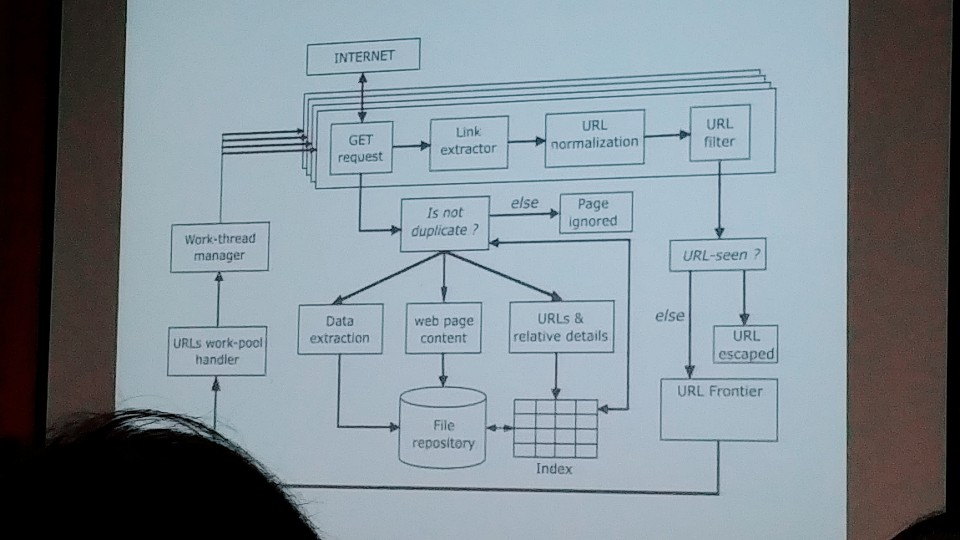

In [5]:
from IPython.display import Image
Image(filename='0715.jpg') 

In [2]:
# http://example.webscraping.com/places/default/index

In [6]:
from bs4 import BeautifulSoup
import re
from html import unescape
import requests
headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}


def download(method, url, headers = headers, param = None, data = None, timeout = 1, maxretries = 3):

    try:        
        resp = requests.request(method, url, params = param, data = data, headers = headers)
        resp.raise_for_status()
    
    except requests.exceptions.HTTPError as e:
        if 500 <= e.response.status_code < 600 and maxretries > 0:
            print(maxretries)
            time.sleep(timeout)
            resp = download(method, url, headers, param, data, timeout, maxretries-1)
        else:
            print(e.response.status_code)
            print(e.response.reason)

    return resp

In [7]:
# 하이퍼링크를 Parsing

url = "http://example.webscraping.com/places/default/index"
html = download("get", url)

In [15]:
dom = BeautifulSoup(html.text, "lxml")
[_["href"] for _ in dom.find_all("a")]

['#',
 '/places/default/user/register?_next=/places/default/index',
 '/places/default/user/login?_next=/places/default/index',
 '/places/default/index',
 '/places/default/search',
 '/places/default/view/Afghanistan-1',
 '/places/default/view/Aland-Islands-2',
 '/places/default/view/Albania-3',
 '/places/default/view/Algeria-4',
 '/places/default/view/American-Samoa-5',
 '/places/default/view/Andorra-6',
 '/places/default/view/Angola-7',
 '/places/default/view/Anguilla-8',
 '/places/default/view/Antarctica-9',
 '/places/default/view/Antigua-and-Barbuda-10',
 '/places/default/index/1']

In [16]:
# http가 붙은 whole url 형태로 붙여줘야 한다.
#   '#'에는 실제론 데이터가 안붙어있다. -> 피해야 한다.

dom = BeautifulSoup(html.text, "lxml")
[requests.compat.urljoin(url, _["href"]) for _ in dom.find_all("a") if len(_["href"]) > 3]

['http://example.webscraping.com/places/default/user/register?_next=/places/default/index',
 'http://example.webscraping.com/places/default/user/login?_next=/places/default/index',
 'http://example.webscraping.com/places/default/index',
 'http://example.webscraping.com/places/default/search',
 'http://example.webscraping.com/places/default/view/Afghanistan-1',
 'http://example.webscraping.com/places/default/view/Aland-Islands-2',
 'http://example.webscraping.com/places/default/view/Albania-3',
 'http://example.webscraping.com/places/default/view/Algeria-4',
 'http://example.webscraping.com/places/default/view/American-Samoa-5',
 'http://example.webscraping.com/places/default/view/Andorra-6',
 'http://example.webscraping.com/places/default/view/Angola-7',
 'http://example.webscraping.com/places/default/view/Anguilla-8',
 'http://example.webscraping.com/places/default/view/Antarctica-9',
 'http://example.webscraping.com/places/default/view/Antigua-and-Barbuda-10',
 'http://example.webscr

In [34]:
def parseURL(seed):
    urlList = list()
    
    html = download("get", seed)
    dom = BeautifulSoup(html.text, "lxml")
    
    return [requests.compat.urljoin(url, _["href"]) for _ in dom.find_all("a") if len(_["href"]) > 3]

In [24]:
import time
queue = list()
queue.append("http://example.webscraping.com/places/default/index/")
seen = list()

while queue:
    baseURL = queue.pop(0)
    seen.append(baseURL)
    # 슬립
    #time.sleep(60)
    linkList = parseURL(baseURL)
    for link in linkList:
        if link not in queue and link not in seen:
            queue.append(link)
    print("Queue: {0}, Seen: {1}".format(len(queue), len(seen)))
#    queue.extend(lingList)

Queue: 15, Seen: 1
Queue: 16, Seen: 2
Queue: 15, Seen: 3
Queue: 14, Seen: 4
Queue: 15, Seen: 5
Queue: 24, Seen: 6
Queue: 28, Seen: 7
Queue: 36, Seen: 8
Queue: 46, Seen: 9
Queue: 49, Seen: 10
Queue: 53, Seen: 11
429
TOO MANY REQUESTS
Queue: 52, Seen: 12
429
TOO MANY REQUESTS
Queue: 51, Seen: 13
429
TOO MANY REQUESTS
Queue: 50, Seen: 14
429
TOO MANY REQUESTS
Queue: 49, Seen: 15
429
TOO MANY REQUESTS
Queue: 48, Seen: 16
429
TOO MANY REQUESTS
Queue: 47, Seen: 17
429
TOO MANY REQUESTS
Queue: 46, Seen: 18
429
TOO MANY REQUESTS
Queue: 45, Seen: 19
429
TOO MANY REQUESTS
Queue: 44, Seen: 20
429
TOO MANY REQUESTS
Queue: 43, Seen: 21
429
TOO MANY REQUESTS
Queue: 42, Seen: 22
429
TOO MANY REQUESTS
Queue: 41, Seen: 23
429
TOO MANY REQUESTS
Queue: 40, Seen: 24
429
TOO MANY REQUESTS
Queue: 39, Seen: 25
429
TOO MANY REQUESTS
Queue: 38, Seen: 26
429
TOO MANY REQUESTS
Queue: 37, Seen: 27
429
TOO MANY REQUESTS
Queue: 36, Seen: 28
429
TOO MANY REQUESTS
Queue: 35, Seen: 29
429
TOO MANY REQUESTS
Queue: 34, 

In [60]:
url = "https://www.google.com/search?q=%EB%A6%B4%EB%9D%BC%EB%93%9C"
html = download("get", url)
dom = BeautifulSoup(html.text, "lxml")

In [69]:
seedaddress = [_.find_parent()["href"] for _ in dom.select(".LC20lb")]
print(len(seedaddress), seedaddress)

8 ['https://namu.wiki/w/%EB%8D%B0%EB%AF%B8%EC%95%88%20%EB%A6%B4%EB%9D%BC%EB%93%9C', 'https://bdata.7mkr.com/basketball_player_data/12577/kr/index.shtml', 'https://nbamania.com/g2/bbs/board.php?bo_table=nbatalk&wr_id=5033291', 'http://m.blog.naver.com/gsjun66/220646465864', 'http://www.eyesmag.com/2019/02/15/beyondsports-adidashoops-dame5/', 'http://news.chosun.com/site/data/html_dir/2019/02/15/2019021501459.html', 'http://www.basketkorea.com/news/articleView.html?idxno=187051', 'http://www.spotvnews.co.kr/?mod=news&act=articleView&idxno=288519']


In [67]:
def parseURL(seed):
    urlList = list()
    
    html = download("get", seed)
    dom = BeautifulSoup(html.text, "lxml")
    
    return [requests.compat.urljoin(url, _["href"]) for _ in dom.find_all("a") if _.has_attr("href") and len(_["href"]) > 3]

In [70]:
import time
queue = list()
queue.append("https://www.google.com/search?q=%EB%A6%B4%EB%9D%BC%EB%93%9C")
seen = list()
a = True
while queue:
    baseURL = queue.pop(0)
    seen.append(baseURL)
    # 슬립
    #time.sleep(60)
    linkList = parseURL(baseURL)
    for link in linkList:
        if link not in queue and link not in seen:
            queue.append(link)
        if len(seen) == 30:
            a = False
            break
    print("Queue: {0}, Seen: {1}".format(len(queue), len(seen)))
    if a == False:
        break
#    queue.extend(lingList)

Queue: 118, Seen: 1
Queue: 152, Seen: 2
Queue: 223, Seen: 3
Queue: 453, Seen: 4
Queue: 456, Seen: 5
Queue: 468, Seen: 6
Queue: 523, Seen: 7
Queue: 572, Seen: 8
Queue: 626, Seen: 9
Queue: 626, Seen: 10
Queue: 695, Seen: 11
Queue: 759, Seen: 12
Queue: 774, Seen: 13
Queue: 797, Seen: 14
Queue: 798, Seen: 15
Queue: 798, Seen: 16
Queue: 801, Seen: 17
Queue: 807, Seen: 18
Queue: 807, Seen: 19
Queue: 813, Seen: 20
Queue: 866, Seen: 21
Queue: 1189, Seen: 22
Queue: 1219, Seen: 23
Queue: 1300, Seen: 24
Queue: 1404, Seen: 25
Queue: 1415, Seen: 26
Queue: 1414, Seen: 27
Queue: 1413, Seen: 28
Queue: 1449, Seen: 29
Queue: 1448, Seen: 30


In [47]:
queue

['https://nbamania.com/g2/bbs/board.php?bo_table=nbatalk&wr_id=5033291',
 'https://webcache.googleusercontent.com/search?q=cache:c0z0hgIw0x0J:https://nbamania.com/g2/bbs/board.php%3Fbo_table%3Dnbatalk%26wr_id%3D5033291+&cd=13&hl=ko&ct=clnk&gl=kr',
 'https://www.google.com/search?q=%EB%A6%B4%EB%9D%BC%EB%93%9C+site:nbamania.com&sa=X&ved=2ahUKEwjO0q-j7rXjAhVrIqYKHQHJD-kQrQIoADAMegQIABAH',
 'http://m.blog.naver.com/gsjun66/220646465864',
 'http://webcache.googleusercontent.com/search?q=cache:HDc6NYQ4nqYJ:m.blog.naver.com/gsjun66/220646465864+&cd=14&hl=ko&ct=clnk&gl=kr',
 'http://www.eyesmag.com/2019/02/15/beyondsports-adidashoops-dame5/',
 'http://webcache.googleusercontent.com/search?q=cache:zbGWyo3RzAoJ:www.eyesmag.com/2019/02/15/beyondsports-adidashoops-dame5/+&cd=15&hl=ko&ct=clnk&gl=kr',
 'http://news.chosun.com/site/data/html_dir/2019/02/15/2019021501459.html',
 'http://webcache.googleusercontent.com/search?q=cache:3gmXKES1ELkJ:news.chosun.com/site/data/html_dir/2019/02/15/20190215014

In [71]:
import time
stack = list()
stack.append("https://www.google.com/search?q=%EB%A6%B4%EB%9D%BC%EB%93%9C")
seen = list()
a = True
while queue:
    baseURL = stack.pop(0)
    seen.append(baseURL)
    # 슬립
    #time.sleep(60)
    linkList = parseURL(baseURL)
    for link in linkList:
        if link not in queue and link not in seen:
            stack.append(link)
        if len(seen) == 30:
            a = False
            break
    print("Stack: {0}, Seen: {1}".format(len(stack), len(seen)))
    if a == False:
        break
#    queue.extend(lingList)

Stack: 79, Seen: 1
Stack: 78, Seen: 2
Stack: 139, Seen: 3
Stack: 138, Seen: 4
Stack: 137, Seen: 5
Stack: 139, Seen: 6
Stack: 180, Seen: 7
Stack: 232, Seen: 8
Stack: 277, Seen: 9
Stack: 276, Seen: 10
Stack: 348, Seen: 11
Stack: 415, Seen: 12
Stack: 431, Seen: 13
Stack: 432, Seen: 14
Stack: 433, Seen: 15
Stack: 434, Seen: 16
Stack: 435, Seen: 17
Stack: 435, Seen: 18
Stack: 434, Seen: 19
Stack: 433, Seen: 20
Stack: 432, Seen: 21
Stack: 431, Seen: 22
Stack: 449, Seen: 23
Stack: 448, Seen: 24
Stack: 447, Seen: 25
Stack: 446, Seen: 26
Stack: 445, Seen: 27
Stack: 444, Seen: 28
Stack: 446, Seen: 29
Stack: 445, Seen: 30


## Focused Crawling
특정 도메인 or 주소 안에서만 돌게 하는 것

In [97]:
# example: 네이버-블로그

def parseURL(seed):
    urlList = list()
    
    html = download("get", seed)
    dom = BeautifulSoup(html.text, "lxml")
    
    if len(dom.select("#mainframe")) < 1:
        return []
    seed = requests.compat.urljoin(seed, dom.select("#mainframe")[0]["src"])
    
    html = download("get", seed)
    dom = BeautifulSoup(html.text, "lxml")
    
    return [requests.compat.urljoin(url, _["href"]) for _ in dom.find_all("a") if _.has_attr("href") and len(_["href"]) > 3 
            and checkBlog(requests.compat.urljoin(seed, _["href"]))]

In [93]:
requests.compat.urlparse("https://blog.naver.com/lebronj23?Redirect=Log&logNo=221150584529")

ParseResult(scheme='https', netloc='blog.naver.com', path='/lebronj23', params='', query='Redirect=Log&logNo=221150584529', fragment='')

In [94]:
def checkBlog(url):
    return requests.compat.urlparse(url)[1] == "blog.naver.com"        # => True인 애들만 쓰면 됨.
checkBlog("https://blog.naver.com/lebronj23?Redirect=Log&logNo=221150584529")

True

In [101]:
import time
queue = list()
queue.append("https://search.naver.com/search.naver?query=%EB%A6%B4%EB%9D%BC%EB%93%9C")
seen = list()
a = True
while queue:
    baseURL = queue.pop(0)
    seen.append(baseURL)    
    linkList = parseURL(baseURL)
    for link in linkList:
        if link not in queue and link not in seen:
            queue.append(link)
        if len(seen) == 30:
            a = False
            break
    print("Queue: {0}, Seen: {1}".format(len(queue), len(seen)))
    if a == False:
        break
#    queue.extend(lingList)

Queue: 0, Seen: 1


In [100]:
seen

['https://search.naver.com/search.naver?query=%EB%A6%B4%EB%9D%BC%EB%93%9C']

## Daum 블로그

In [125]:
# example: 다음-블로그

def parseURL(seed):
#    urlList = list()
    
    html = download("get", seed)
    dom = BeautifulSoup(html.text, "lxml")
    
#    if len(dom.select("#mainframe")) < 1:
#        return []
#    seed = requests.compat.urljoin(seed, dom.select("#mainframe")[0]["src"])
    
#    html = download("get", seed)
#    dom = BeautifulSoup(html.text, "lxml")
    
    return [requests.compat.urljoin(url, _["href"]) for _ in dom.find_all("a") if _.has_attr("href") and len(_["href"]) > 3 
            and checkBlog(requests.compat.urljoin(seed, _["href"]))]

In [119]:
requests.compat.urlparse("kassy92.tistory.com/11")

ParseResult(scheme='', netloc='', path='kassy92.tistory.com/11', params='', query='', fragment='')

In [145]:
def checkBlog(url):
    return requests.compat.urlparse(url)[1].endswith("tistory.com")

re.search(".+?\.tistory.com", "http://kassy92.tistory.com/11")

<re.Match object; span=(0, 26), match='http://kassy92.tistory.com'>

In [142]:
url = "https://search.daum.net/search?q=%EB%A6%B4%EB%9D%BC%EB%93%9C"
html = download("get", url)
dom = BeautifulSoup(html.text, "lxml")
[_  for _ in dom.select("#blogColl a.f_link_b") if checkBlog]

[<a class="f_link_b" href="http://kassy92.tistory.com/11" onclick='smartLog(this, "s=TO&amp;a=BOTO&amp;dc=BR1&amp;d=22Vsjnxkuw6hqHCxoS&amp;pg=1&amp;r=1&amp;e1=122vbAkYE1vowOGLAW&amp;e2=794570&amp;rc=4&amp;ext=&amp;at=link&amp;p=1", event);' target="_blank">[케이시의 NBA칼럼] <b>릴라드</b>의 위대한 클러치타임</a>,
 <a class="f_link_b" href="http://blog.naver.com/PostView.nhn?blogId=weldingman81&amp;logNo=221522932022" onclick='smartLog(this, "s=TO&amp;a=BOTO&amp;dc=BR1&amp;d=227hYJy7nqeruTZuRd&amp;pg=1&amp;r=2&amp;e1=12Hbd3YkJLG2jEAR89&amp;e2=728111&amp;rc=4&amp;ext=&amp;at=link&amp;p=1", event);' target="_blank">데미안 <b>릴라드</b>, 포틀랜드의 맹주</a>,
 <a class="f_link_b" href="http://blog.naver.com/PostView.nhn?blogId=bluefiter65&amp;logNo=220875095268" onclick='smartLog(this, "s=TO&amp;a=BOTO&amp;dc=BR1&amp;d=2297RW-sdyTX25hw5x&amp;pg=1&amp;r=3&amp;e1=12YUb-wNaoy3emiW65&amp;e2=728111&amp;rc=4&amp;ext=&amp;at=link&amp;p=1", event);' target="_blank">[아디다스] <b>릴라드</b> ID 서비스 리뷰!</a>,
 <a class="f_link_b" href="htt

In [144]:
def parseURL(seed):
    html = download("get", seed[0])
    dom = BeautifulSoup(html.text, "lxml")
    
    return [(requests.compat.urljoin(seed[0], _["href"]),seed[1]+1) 
            for _ in dom.find_all("a") if seed[1]<2 and _.has_attr("href") and len(_["href"]) > 3 
            and checkBlog(requests.compat.urljoin(seed[0], _["href"]))]
    


seen = list()
queue = list()

queue.extend([(_["href"],1) for _ in dom.select("#blogColl a.f_link_b" ) if checkBlog(_["href"])])

while queue:
    baseURL = queue.pop(0) 
    seen.append(baseURL)
    linkList = parseURL(baseURL)
    
    for link in linkList:
        if link not in queue and link not in seen:
            queue.append(link)
            #링크 리스트 가져와서 없으면 어팬드 그때그때 함-> 중복된 것 피하기 가능 
            
    print("Queue : {0}, Seen : {1}".format(len(queue), len(seen)))

Queue : 23, Seen : 1
Queue : 22, Seen : 2
Queue : 21, Seen : 3
Queue : 20, Seen : 4
Queue : 19, Seen : 5
Queue : 18, Seen : 6
Queue : 17, Seen : 7
Queue : 16, Seen : 8
Queue : 15, Seen : 9
Queue : 14, Seen : 10
Queue : 13, Seen : 11
Queue : 12, Seen : 12
Queue : 11, Seen : 13
Queue : 10, Seen : 14
Queue : 9, Seen : 15
Queue : 8, Seen : 16
Queue : 7, Seen : 17
Queue : 6, Seen : 18
Queue : 5, Seen : 19
Queue : 4, Seen : 20
Queue : 3, Seen : 21
Queue : 2, Seen : 22
Queue : 1, Seen : 23
Queue : 0, Seen : 24


In [235]:
# SQLite 붙이자
import sqlite3

In [204]:
def parseURL(seed):
    html = download("get", seed[0])
    dom = BeautifulSoup(html.text, "lxml")
    
    return [requests.compat.urljoin(seed, _["href"]) 
            for _ in dom.find_all("a") if _.has_attr("href") and len(_["href"]) > 3]

In [149]:
# 테이블 하나에 ...
# id, url, seen, date  정도는 있어야 한다.
# PK는 무조건 int 값으로

# table1 = id, url, seen, date      # path + parameter 쿼리 
# table2 = id, netloc, date
# url = netloc + path + param

In [241]:
con = sqlite3.connect('bot.db')
cur = con.cursor()

In [279]:
cur.executescript("DROP TABLE table1; DROP TABLE table2")
con.commit()

In [280]:
cur.executescript("""
    CREATE TABLE table1 (
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        table2_id INTEGER NOT NULL,
        path TEXT NOT NULL,
        param TEXT,
        depth INTEGER NOT NULL,
        inbound INTEGER NOT NULL,
        seen BOOLEAN DEFAULT FALSE,
        date TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
    );
    
    CREATE TABLE table2 (
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        netloc TEXT NOT NULL,
        date TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
    );
""")
con.commit()

# DROP Table IF EXISTS table1/2;

In [281]:
url = "https://www.google.com/search?q=%EB%A6%B4%EB%9D%BC%EB%93%9C"
html = download("get", url)
dom = BeautifulSoup(html.text, "lxml")

for href in [_.find_parent()["href"] for _ in dom.select(".LC20lb")]:
    _urlparse = requests.compat.urlparse(href)
    netloc = "://".join(_urlparse[:2])
    cur.execute("SELECT id FROM table2 WHERE netloc =? LIMIT 0,1", [netloc])
    netlocID = cur.fetchone()
    
    if not netlocID:
        cur.execute("INSERT INTO table2(netloc) VALUES(?)", [netloc])
        con.commit()
        cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1", [netloc])
        netlocID = cur.fetchone()
    
    
    cur.execute("INSERT INTO table1(table2_id, path, param, depth, inbound) VALUES(?,?,?,?,?)", [netlocID[0], _urlparse[2], _urlparse[4],1,0])
    print(cur.lastrowid,netlocID)
    con.commit()

1 (1,)
2 (2,)
3 (3,)
4 (4,)
5 (5,)
6 (6,)
7 (7,)
8 (8,)


In [282]:
i = 0
while True:
    cur.execute("""
        SELECT table1.id, table2.netloc, table1.path, table1.param, table1.depth, table2.id
        FROM table1
        JOIN table2 ON table1.table2_id=table2.id
        WHERE table1.seen=FALSE and table1.depth < 3
        ORDER BY table1.date ASC
        LIMIT 0,1;
    """)
    seed = cur.fetchone()
    if not seed or i > 1000:
        break;
    i +=1
    cur.execute("""
        UPDATE table1
        SET seen=TRUE
        WHERE id=?
    """, [seed[0]])
    con.commit()
        
    baseURL = "{0}{1}?{2}".format(seed[1],seed[2],seed[3])
    
    for href in [_.find_parent()["href"] for _ in dom.select(".LC20lb")]:
        _urlparse = requests.compat.urlparse(href)
        netloc = "://".join(_urlparse[:2])
        cur.execute("SELECT id FROM table2 WHERE netloc =? LIMIT 0,1", [netloc])
        netlocID = cur.fetchone()

        if not netlocID:
            cur.execute("INSERT INTO table2(netloc) VALUES(?)", [netloc])
            con.commit()
            cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1", [netloc])
            netlocID = cur.fetchone()

    
        cur.execute("INSERT INTO table1(table2_id, path, param, depth, inbound) VALUES(?,?,?,?,?)", 
                    [netlocID[0], _urlparse[2], _urlparse[4], seed[4]+1, seed[5]])
        print(cur.lastrowid,netlocID)
        con.commit()
        #break

9 (1,)
10 (2,)
11 (3,)
12 (4,)
13 (5,)
14 (6,)
15 (7,)
16 (8,)
17 (1,)
18 (2,)
19 (3,)
20 (4,)
21 (5,)
22 (6,)
23 (7,)
24 (8,)
25 (1,)
26 (2,)
27 (3,)
28 (4,)
29 (5,)
30 (6,)
31 (7,)
32 (8,)
33 (1,)
34 (2,)
35 (3,)
36 (4,)
37 (5,)
38 (6,)
39 (7,)
40 (8,)
41 (1,)
42 (2,)
43 (3,)
44 (4,)
45 (5,)
46 (6,)
47 (7,)
48 (8,)
49 (1,)
50 (2,)
51 (3,)
52 (4,)
53 (5,)
54 (6,)
55 (7,)
56 (8,)
57 (1,)
58 (2,)
59 (3,)
60 (4,)
61 (5,)
62 (6,)
63 (7,)
64 (8,)
65 (1,)
66 (2,)
67 (3,)
68 (4,)
69 (5,)
70 (6,)
71 (7,)
72 (8,)
73 (1,)
74 (2,)
75 (3,)
76 (4,)
77 (5,)
78 (6,)
79 (7,)
80 (8,)
81 (1,)
82 (2,)
83 (3,)
84 (4,)
85 (5,)
86 (6,)
87 (7,)
88 (8,)
89 (1,)
90 (2,)
91 (3,)
92 (4,)
93 (5,)
94 (6,)
95 (7,)
96 (8,)
97 (1,)
98 (2,)
99 (3,)
100 (4,)
101 (5,)
102 (6,)
103 (7,)
104 (8,)
105 (1,)
106 (2,)
107 (3,)
108 (4,)
109 (5,)
110 (6,)
111 (7,)
112 (8,)
113 (1,)
114 (2,)
115 (3,)
116 (4,)
117 (5,)
118 (6,)
119 (7,)
120 (8,)
121 (1,)
122 (2,)
123 (3,)
124 (4,)
125 (5,)
126 (6,)
127 (7,)
128 (8,)
129 (1,)
130

In [283]:
cur.close()
con.close()

In [201]:
requests.compat.urlparse(html.request.url)

ParseResult(scheme='https', netloc='www.google.com', path='/search', params='', query='q=%EB%A6%B4%EB%9D%BC%EB%93%9C', fragment='')

In [ ]:
# inbound 계산 식
select inbound, count(inbound)
from table1
where table2_id=2 
group by inbound;

In [263]:
cur.execute("""
    select inbound, count(inbound)
    from table1
    where table2_id=5
    group by inbound;
""")
cur.fetchall()

[(0, 1), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9)]

In [ ]:
queue = list()
queue.extend([(_["href"],1) for _ in dom.select(".LC20lb" ) if checkBlog(_["href"])])
seen = list()

while queue:
    baseURL = queue.pop(0) 
    seen.append(baseURL)
    linkList = parseURL(baseURL)
    
    for link in linkList:
        if link not in queue and link not in seen:
            queue.append(link)
            #링크 리스트 가져와서 없으면 어팬드 그때그때 함-> 중복된 것 피하기 가능 `
            
    print("Queue : {0}, Seen : {1}".format(len(queue), len(seen)))

In [ ]:
def parseURL(seed):
    urlList = list()
    
    html = download("get", seed[0])
    dom = BeautifulSoup(html.text, "lxml")
    
    # 2번째로 넘어오는 애는 depth가 2가 될거야
    return [(requests.compat.urljoin(seed[0], _["href"]), seed[1]+1)
            for _ in dom.find_all("a") 
            if seed[1] < 2 and _.has_attr("href") and len(_["href"]) > 3 
               and checkDaumBlog(requests.compat.urljoin(seed[0],_["href"]))] # 블로그인 페이지만 들어가서 보겠다